# **ML Analysis and Proccessing of the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data

fredData = pd.read_csv('FRED_Data.csv')
fredData

,Date,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,6.35,36.75,5.88
1,2000-09-19,6.41,36.96,5.86
2,2000-09-20,6.43,37.22,5.91
3,2000-09-21,6.45,33.84,5.88
4,2000-09-22,6.50,32.66,5.85
...,...,...,...,...
6332,2024-12-25,NaN,NaN,NaN
6333,2024-12-26,2.86,70.38,4.58
6334,2024-12-27,2.84,71.28,4.62
6335,2024-12-30,2.94,71.73,4.55


In [3]:
# Read the data

nasdaqData = pd.read_csv('dataNQ.csv')
nasdaqData

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,Daily ROC
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002,0.006500
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997,0.041193
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001,0.012881
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000,-0.022839
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996,0.002922
...,...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000,-0.006527
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996,0.006674
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999,0.014429
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002,-0.004319


# Merge the data

In [4]:
# Merge the data

nasdaqData['Date'] = pd.to_datetime(nasdaqData['Date'])
fredData['Date'] = pd.to_datetime(fredData['Date'])

nasdaqData = nasdaqData.drop_duplicates(subset='Date')
fredData = fredData.drop_duplicates(subset='Date')

data_full = pd.merge(nasdaqData, fredData, on = 'Date', how = 'inner')
data_full

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,Daily ROC,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002,0.006500,6.35,36.75,5.88
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997,0.041193,6.41,36.96,5.86
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001,0.012881,6.43,37.22,5.91
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000,-0.022839,6.45,33.84,5.88
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996,0.002922,6.50,32.66,5.85
...,...,...,...,...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000,-0.006527,2.66,70.25,4.32
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996,0.006674,2.68,71.54,4.40
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999,0.014429,2.69,71.03,4.39
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002,-0.004319,2.75,70.31,4.40


In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6097 non-null   datetime64[ns]
 1   Close              6097 non-null   float64       
 2   SMA100             6097 non-null   float64       
 3   RSI                6097 non-null   float64       
 4   VWAP               6093 non-null   float64       
 5   VIX Close          6097 non-null   float64       
 6   DXY Close          6097 non-null   float64       
 7   Daily ROC          6097 non-null   float64       
 8   High Yield Spread  6095 non-null   float64       
 9   WTI Oil Price      6073 non-null   float64       
 10  10-Yr Yield        6053 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 524.1 KB


In [6]:
 # Drop the Date column

data_full = data_full.drop('Date', axis = 1)

# **Build the Pipeline**

# Cleaner

In [7]:
# Import the corresponding libraries and modules

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [8]:
# Divide the data into features and target

X = data_full.drop(columns = 'Daily ROC')
y = data_full['Daily ROC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)   

In [9]:
# Create a class for cleaning the data

class Cleaner(BaseEstimator, TransformerMixin):

    def __init__(self, columns_to_impute = None, n_neighbors = 5):
        self.columns_to_impute = columns_to_impute
        self.n_neighbors = n_neighbors
        self.imputer = None

    def fit(self, X, y = None):

        if self.columns_to_impute:
            self.imputer = KNNImputer(n_neighbors = self.n_neighbors)
            self.imputer.fit(X[self.columns_to_impute])
        return self

    def transform(self, X):

        X_cleaned = X.copy()
        
        # Impute the missing values

        if self.columns_to_impute and self.imputer:
            X_cleaned[self.columns_to_impute] = self.imputer.transform(X_cleaned[self.columns_to_impute])

        # Round 2 decimal places

        X_cleaned = X_cleaned.round(2)

        return X_cleaned

# Set the Pipeline (Cleaner, Standardization, PCA)

In [10]:
pipeline = Pipeline(steps=[
    ('cleaner', Cleaner(columns_to_impute=['VWAP', 'High Yield Spread', 'WTI Oil Price', '10-Yr Yield'])),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))
])

In [11]:
# Fit the pipeline

X_pre = pipeline.fit_transform(X)

In [12]:
X_pre

array([[-1.21944989,  2.11358404, -2.27617933, -0.94363356,  0.52906764],
       [-1.13508398,  1.9504894 , -2.35129757, -0.55498666,  0.7556276 ],
       [-1.11926865,  1.93187632, -2.3653998 , -0.42843585,  0.89289112],
       ...,
       [ 5.64145008,  1.02878774, -0.80912519, -0.06591419,  1.81752648],
       [ 5.57198818,  1.16522791, -0.70808559, -0.24509998,  1.72665242],
       [ 5.12619583,  2.05594465, -0.01809668, -0.92725931,  1.62336308]],
      shape=(6097, 5))

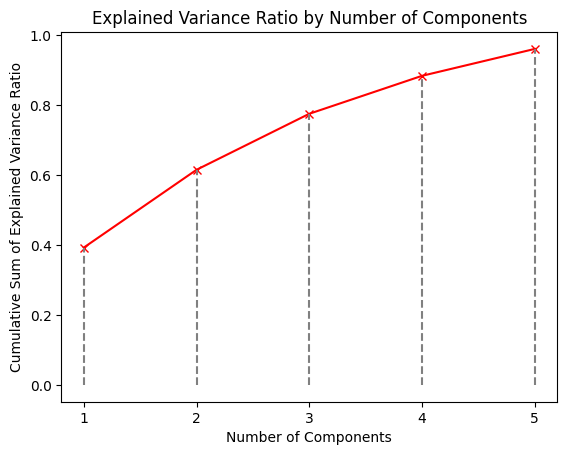

In [16]:
# Explained Variance Ratio by Number of Components

pca = pipeline.named_steps['pca']
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'x-r')

for i, explained_var_ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    plt.vlines(int(i), 0, explained_var_ratio, linestyles='dashed', colors='gray')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

A prior analysis suggests that 5 components explained more than 90% of the variance

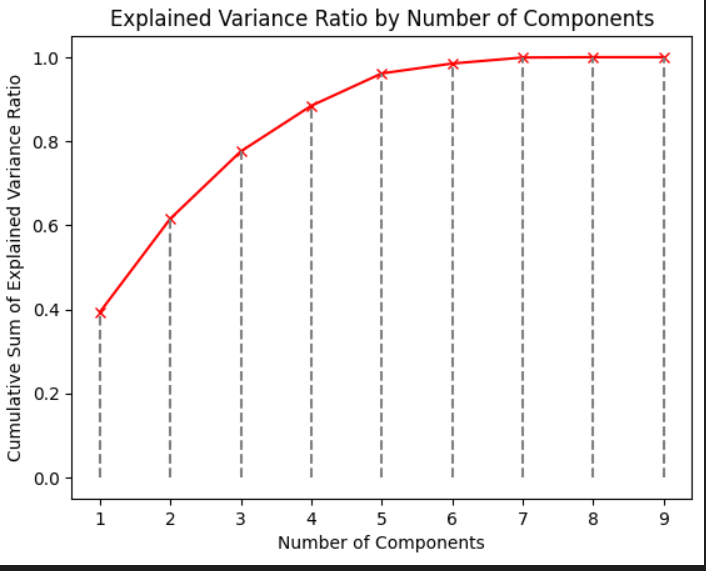

In [18]:
# Turn the data into a DataFrame

X_pre = pd.DataFrame(X_pre, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_pre

,PC1,PC2,PC3,PC4,PC5
0,-1.219450,2.113584,-2.276179,-0.943634,0.529068
1,-1.135084,1.950489,-2.351298,-0.554987,0.755628
2,-1.119269,1.931876,-2.365400,-0.428436,0.892891
3,-1.238036,2.139040,-2.272376,-0.915758,0.490418
4,-1.230254,1.946916,-2.245905,-0.441156,0.763140
...,...,...,...,...,...
6092,5.548763,1.048352,-0.823607,-0.258428,1.582956
6093,5.583352,1.010179,-0.845707,-0.226492,1.702337
6094,5.641450,1.028788,-0.809125,-0.065914,1.817526
6095,5.571988,1.165228,-0.708086,-0.245100,1.726652


In [19]:
y

0       0.006500
1       0.041193
2       0.012881
3      -0.022839
4       0.002922
          ...   
6092   -0.006527
6093    0.006674
6094    0.014429
6095   -0.004319
6096   -0.036158
Name: Daily ROC, Length: 6097, dtype: float64